In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


# # US ACCIDENTS EXPLORATORY DATA ANALYSIS

TODO - Talks about the dataset .
- Kaggle
- information about accidents
- can use useful to prevent accidents
- mention that the dataset do not contain the new york data.

In [3]:
import numpy as np
import pandas as pd


Uploading the dataset

In [4]:
df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')


In [5]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [6]:
df.shape

(7728394, 46)

In [7]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [9]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


**To Check how many numeric columns are there in our dataset**

In [10]:
numerics =['int16','int32','int64','float16','float32','float64']
numeric_df =df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

**Finding Missing Values And Null Values**

Percentage of missing values per column 

In [11]:
missing_percentages = df.isnull().sum().sort_values(ascending=False)/len(df)
missing_percentages

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

In [12]:
missing_percentages[missing_percentages!= 0]

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
dtype: float64

<Axes: >

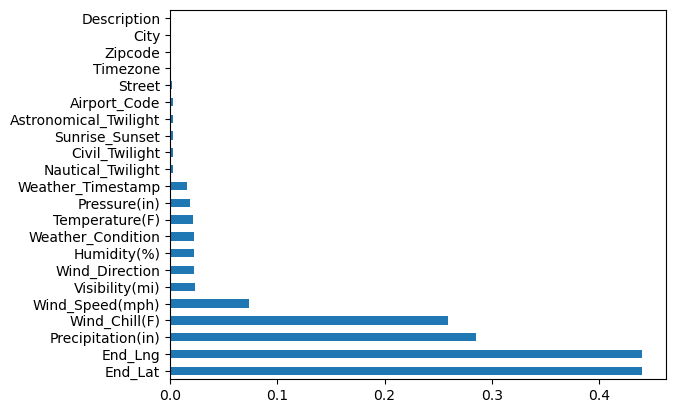

In [13]:
missing_percentages[missing_percentages!= 0].plot(kind='barh')

Removing columns that you don't want to use.

In [14]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

**Columns we'll analyze**
- City 
- Start time 
- Start lat , Start Lng 
- Temperature 
- Weather_Condition 


In [15]:
cities = df.City.unique()
len(cities)

13679

In [16]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: City, Length: 13678, dtype: int64

In [17]:
cities_by_accident[:20]

Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: City, dtype: int64

In [18]:
'NY' in df.State

False

<Axes: >

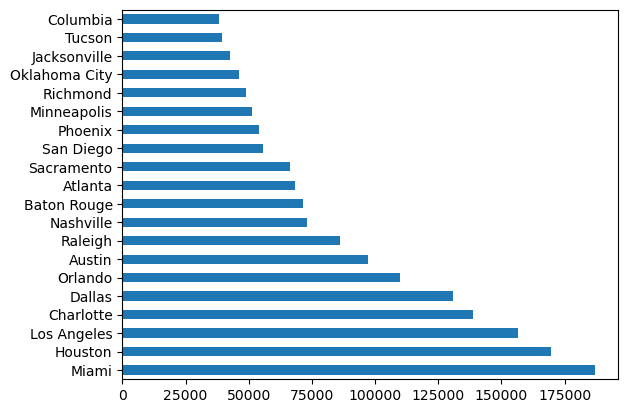

In [19]:
cities_by_accident[:20].plot(kind = 'barh')

In [20]:
import seaborn as sns
sns.set_style("darkgrid")


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/tmp/ipykernel_33/3405282844.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities_by_accident)


<Axes: xlabel='City', ylabel='Density'>

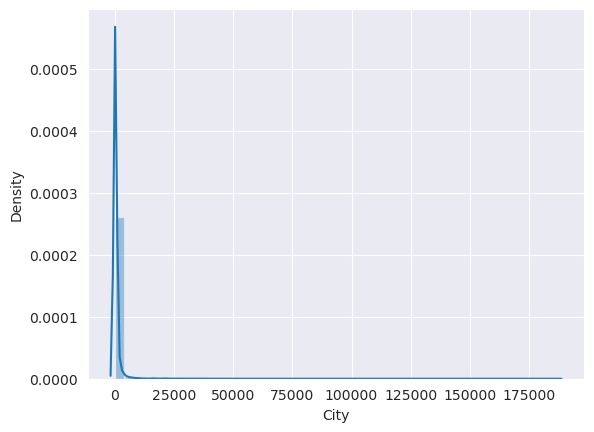

In [21]:
sns.distplot(cities_by_accident)

In [22]:
high_accident_cities = cities_by_accident[ cities_by_accident>=5000]
low_accident_cities = cities_by_accident[ cities_by_accident<5000]

In [23]:
len(high_accident_cities)/len(cities)

0.01688719935667812

/tmp/ipykernel_33/2843252471.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_accident_cities)


<Axes: xlabel='City', ylabel='Density'>

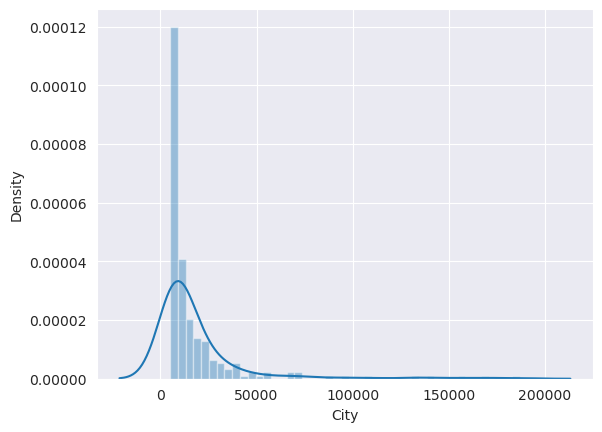

In [24]:
sns.distplot(high_accident_cities)

In [25]:
len(low_accident_cities)/len(cities)

0.983039695884202

<Axes: xlabel='City', ylabel='Count'>

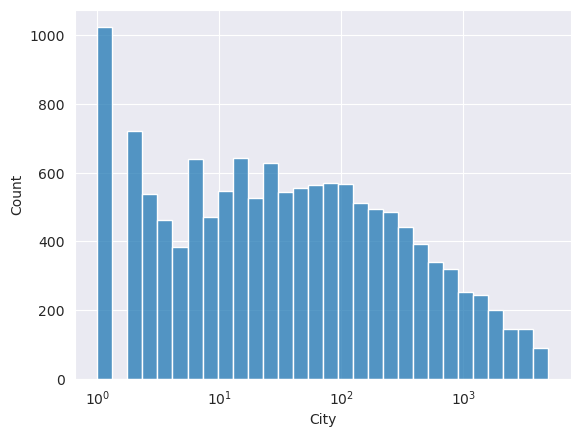

In [26]:
sns.histplot(low_accident_cities,log_scale = True )

In [27]:
cities_by_accident[cities_by_accident == 1]

Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1023, dtype: int64

In [28]:
cities_by_accident[cities_by_accident == 2]

Sublette             2
Hunnewell            2
Waterville Valley    2
Dell City            2
Jolon                2
                    ..
Calipatria           2
Etlan                2
New Bavaria          2
Newark Valley        2
Buckholts            2
Name: City, Length: 722, dtype: int64

**Start Time

In [29]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

pandas parse  dates

In [30]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time[0]


Timestamp('2016-02-08 05:46:00')

padas get hour from timestamp

/tmp/ipykernel_33/688047399.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.hour,bins = 24, kde = False, norm_hist=True )


<Axes: xlabel='Start_Time'>

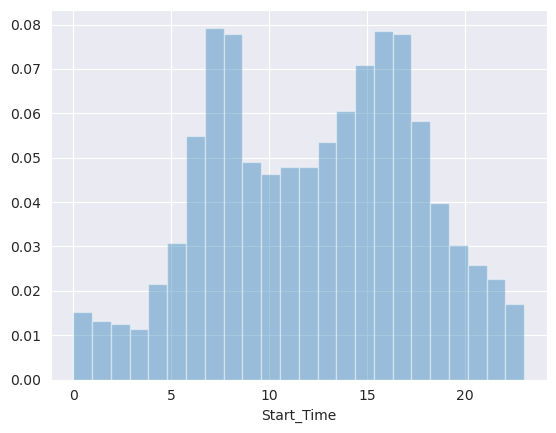

In [31]:
sns.distplot(df.Start_Time.dt.hour,bins = 24, kde = False, norm_hist=True )

#norm_hist is used for showing percentages on x axis.

A high percenatge accident occur between 6 am to 10 am & 3pm to 6pm  (probably people is in hurry to work )

**Is the distribution of accidents by hour the same on weekends as on weekdays ?**

For Sundays  (6)

/tmp/ipykernel_33/671819881.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sundays_start_time.dt.hour,bins = 24, kde = False, norm_hist=True )


<Axes: xlabel='Start_Time'>

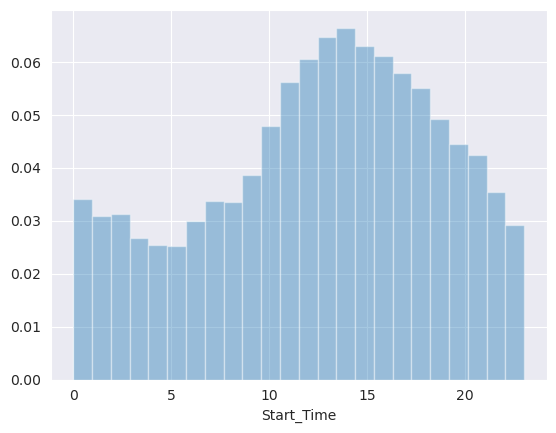

In [32]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek ==6]
sns.distplot(sundays_start_time.dt.hour,bins = 24, kde = False, norm_hist=True )

On Sundays, the peak occurs between 10 am and 3 pm , unlike weekdays.

For Mondays  (0)

/tmp/ipykernel_33/359316215.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mondays_start_time.dt.hour,bins = 24, kde = False, norm_hist=True )


<Axes: xlabel='Start_Time'>

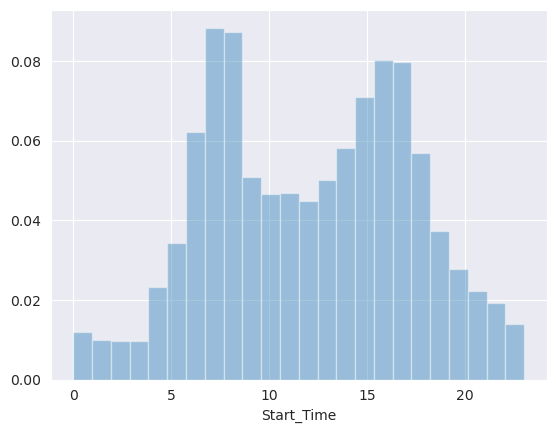

In [33]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek ==0]
sns.distplot(mondays_start_time.dt.hour,bins = 24, kde = False, norm_hist=True )

Here the peak time of accidents between 8am-10am and 5pm- 7pm .

1. Are there more accident s in warmer or colder areas?
2. Which 5 states have the highest number of accidents? how about per capita?
3. Does New York show up in the data? 
4. Among the top 100 cities in number of accidents , which states do they belong to the most frequently?
5. What time of the day are accidents most frequent in?
6. Which days of week have the most accidnets?
7. Which months have the most accidents?
8. What is the trends of accidents year over year(increasing/decreasing)?
9. When is the accidents per unit of traffic the highest.
10. Is the distribution of accidents by hour the same on weekends as on weekdays.


pandas dt day of week

mon- 0 
tues...

/tmp/ipykernel_33/1485998435.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.dayofweek,bins = 7, kde = False, norm_hist=True )


<Axes: xlabel='Start_Time'>

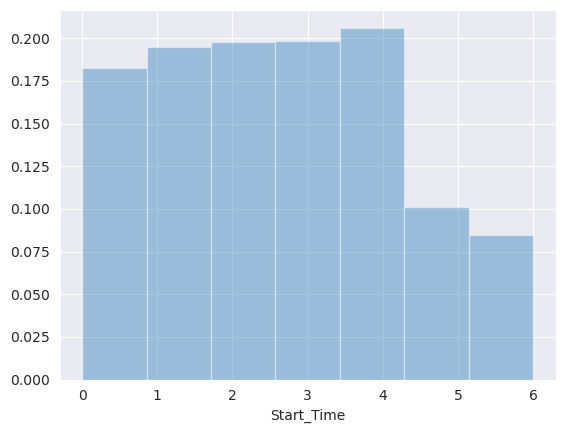

In [34]:
sns.distplot(df.Start_Time.dt.dayofweek,bins = 7, kde = False, norm_hist=True )

 On weekends we have less no. of accidents as compared to working days.

/tmp/ipykernel_33/2383398410.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mondays_start_time.dt.month,bins = 12, kde = False, norm_hist=True )


<Axes: xlabel='Start_Time'>

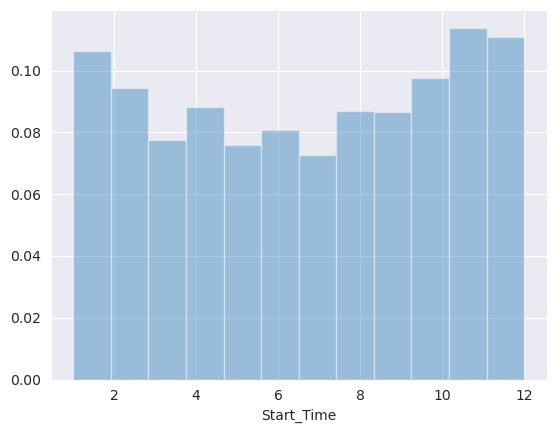

In [35]:
sns.distplot(mondays_start_time.dt.month,bins = 12, kde = False, norm_hist=True )

Peak months for accidents are - January ,February , November and December in the winter season due to fog.

/tmp/ipykernel_33/1137537202.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.month,bins = 12, kde = False, norm_hist=True )


<Axes: xlabel='Start_Time'>

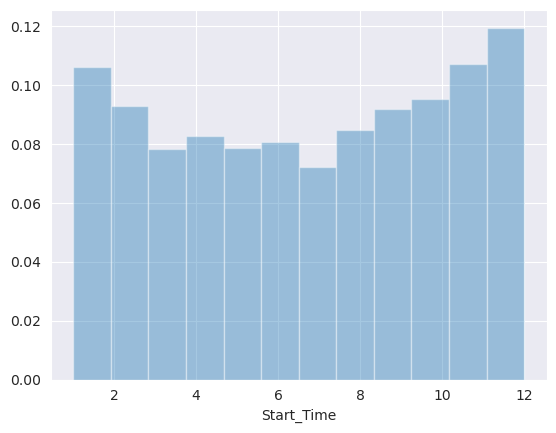

In [42]:
df_2020= df.Start_Time.dt.year == 2020
sns.distplot(df.Start_Time.dt.month,bins = 12, kde = False, norm_hist=True )


In [41]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# Comparing the MapQuest data or Bing data

/tmp/ipykernel_33/3075008777.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2022_Bing.Start_Time.dt.month,bins = 12, kde = False, norm_hist=True )


<Axes: xlabel='Start_Time'>

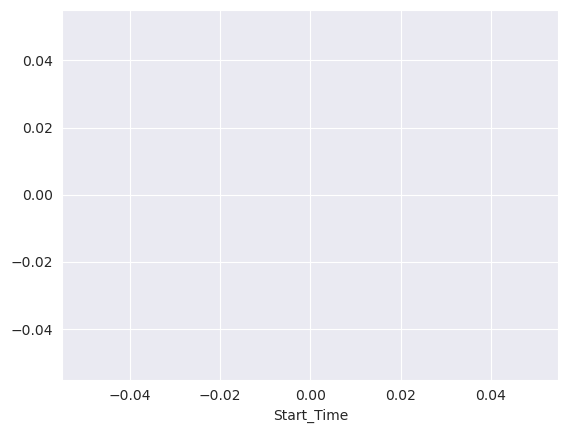

In [57]:
df_2022 = df[ df.Start_Time.dt.year == 2022]
df_2022_Bing = df_2022[df_2022.Source =='Bing']
sns.distplot(df_2022_Bing.Start_Time.dt.month,bins = 12, kde = False, norm_hist=True )

/tmp/ipykernel_33/1533584712.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2020.Start_Time.dt.month,bins = 12, kde = False, norm_hist=True )


<Axes: xlabel='Start_Time'>

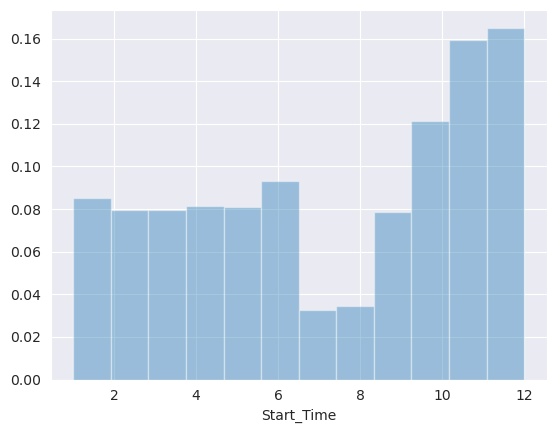

In [52]:
df_2020 = df[ df.Start_Time.dt.year == 2020]
df_2020_Bing = df_2020[df_2020.Source =='Bing']
sns.distplot(df_2020.Start_Time.dt.month,bins = 12, kde = False, norm_hist=True )

In [51]:
df.Source

0          Source2
1          Source2
2          Source2
3          Source2
4          Source2
            ...   
7728389    Source1
7728390    Source1
7728391    Source1
7728392    Source1
7728393    Source1
Name: Source, Length: 7728394, dtype: object

<Axes: ylabel='Source'>

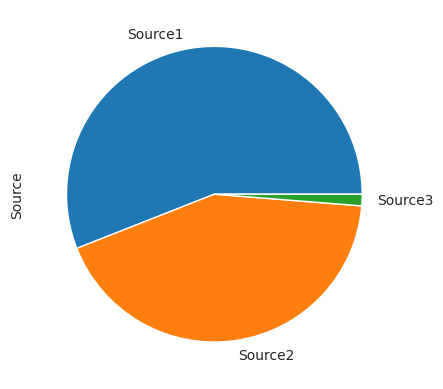

In [58]:
df.Source.value_counts().plot(kind='pie')

**Data preparation and Cleaning **

- Load the file using pandas
- look at some information about the file
- Fix any missing and incorrect values.

# ******Summary and Conclusion**
Insights:
  - No data for New York 
  - Less than 1% of cities have more than 5000 yearly accident
  - more than 9% of cities have less than 5000 yearly accident
  - over 1023 cities have reported just one accident 
  - over 722 cities have reported just two accident 
  - The number of accidents per city decreases/increases expontially .
  - A high percenatge accident occur between 6 am to 10 am & 3pm to 6pm (probably people is in hurry to work )
  - On weekends we have less no. of accidents as compared to working days.
  - No Bing data and MapQuest data.
  - Peak months for accidents are -January, February , November and December in the winter season due to fog.
 